<a href="https://colab.research.google.com/github/Amrutakumbar/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic-Machine Learning From Diaster

# Titanic Data Set

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv('D:\\titanic\\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test=pd.read_csv('D:\\titanic\\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis 

In [ ]:
#check missing value

### Missing Data

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#using heatmap to check detailed missing values 

<AxesSubplot:>

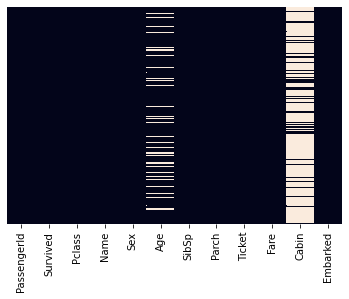

In [ ]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [ ]:
#now counts for how many survived(==1) and not survived(==0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

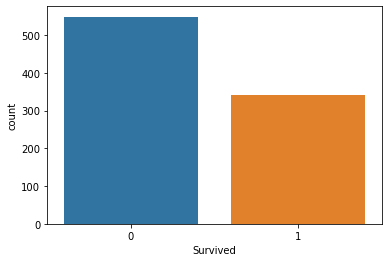

In [ ]:
sns.countplot(x='Survived',data=train)

from above plot,we get to know that no. of people were survived less

Now I want to check that no. of male and female survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

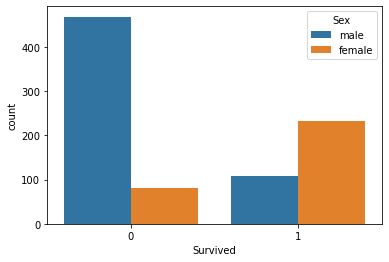

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

From above plot we get to know that no. of females were survived more than male.

Now i want to know that no. of passangers survived based on there class

<AxesSubplot:xlabel='Survived', ylabel='count'>

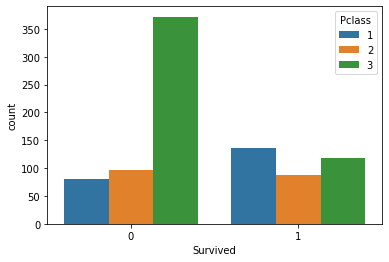

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

check whether Age column follows normal ditribution or not

<AxesSubplot:xlabel='Age', ylabel='Count'>

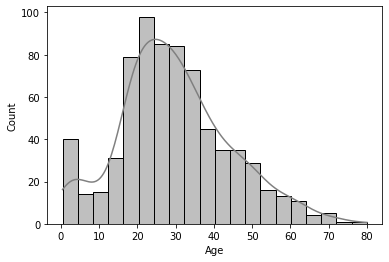

In [ ]:
sns.histplot(x='Age',data=train,color='grey',kde=True)

count whether sibling/spouse who had survived or not

<AxesSubplot:xlabel='SibSp', ylabel='count'>

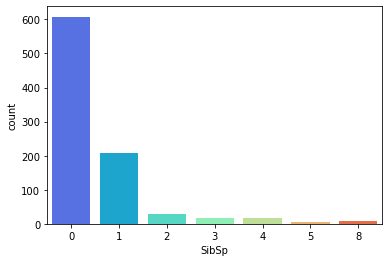

In [ ]:
sns.countplot(x='SibSp',data=train,palette='rainbow')

plot a histogram to check who bought tickets

<AxesSubplot:xlabel='Fare', ylabel='Count'>

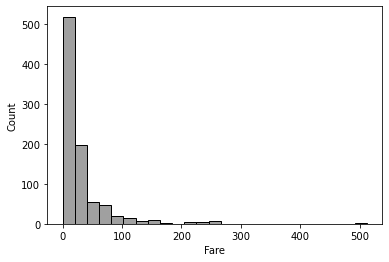

In [ ]:
sns.histplot(x='Fare',data=train,color='grey',bins=25)

## DATA CLEANING

Column "Age" and "Cabin" having null values, instead of droping them, i want to fill with avg value of passanger class of particular age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

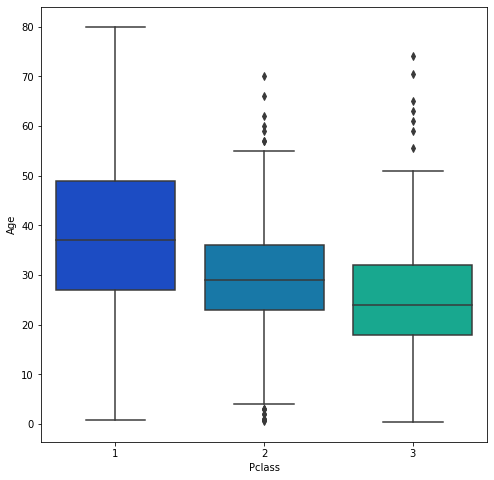

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

we can clearly see the passanger class 1 is making sense more

In [ ]:
#fill the null values

In [ ]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
    
        elif Pclass==2:
            return 29
    
        elif Pclass==3:
            return 24
            
        else:
            return Age
    

In [ ]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,NaN,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,NaN,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,NaN,0,0,111369,30.0000,C148,C


In [ ]:
#lets check heatmap again

<AxesSubplot:>

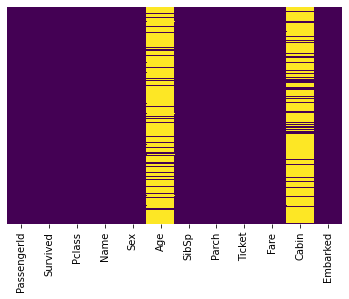

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#and drop the cabin column because it has null value high

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

# Converting Categorical into Numerical

In [ ]:
#column sex and column Embarked has object,so coverting into numerical by one hot coding method

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Survived     177 non-null    int64  
 2   Pclass       177 non-null    int64  
 3   Name         177 non-null    object 
 4   Sex          177 non-null    object 
 5   Age          177 non-null    float64
 6   SibSp        177 non-null    int64  
 7   Parch        177 non-null    int64  
 8   Ticket       177 non-null    object 
 9   Fare         177 non-null    float64
 10  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 16.6+ KB


In [ ]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
#also not needed Sex,Embarked,name & ticket column so drop them

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6,0,3,24.0,0,0,8.4583
17,18,1,2,29.0,0,0,13.0000
19,20,1,3,24.0,0,0,7.2250
26,27,0,3,24.0,0,0,7.2250
28,29,1,3,24.0,0,0,7.8792


# Building a logistic regression

# Train Test Split

In [ ]:
#survived is dependent
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
5,6,3,24.0,0,0,8.4583
17,18,2,29.0,0,0,13.0000
19,20,3,24.0,0,0,7.2250
26,27,3,24.0,0,0,7.2250
28,29,3,24.0,0,0,7.8792


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
                                  train.drop('Survived',axis=1),
                                  train['Survived'],
                                   test_size=0.30,random_state=101)

Traing and Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
!pip3 install -U scikit-learn scipy matplotlib

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached scipy-1.6.3-cp38-cp38-win_amd64.whl (32.7 MB)
  Using cached matplotlib-3.4.2-cp38-cp38-win_amd64.whl (7.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2


In [ ]:
 from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[35,  6],
       [10,  3]], dtype=int64)

In [ ]:
 from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7037037037037037

In [ ]:
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)